In [1]:
#One time installation.
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt

import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

In [3]:
#Read loan data and convert into data frame
loan= pd.read_csv(r'content/loan.csv')

#1. Data understanding and Cleaning

Check if there are any header or footer or summary details are there. IF found, delete it.

In [4]:
#Print summary of loan data
loan.head()
#print(loan.shape)
loan.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


THere are no header or summary rows, now check footer rows

In [5]:
loan.tail(3)
#print(loan.tail())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_rows = len(loan)

total_rows

39717

In [7]:
#Check various loan status and their count
loan["loan_status"].value_counts()
print(loan["loan_status"].value_counts())

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [8]:
#Drop current loans
loan = loan[loan["loan_status"] != "Current"]
len(loan)
print('Number of rows excluding Loan status as Current', len(loan))

Number of rows excluding Loan status as Current 38577


In [9]:
print(f"total_rows: {total_rows} ")
print(f"length of loan: {len(loan)} ")
#percentage of rows deleted
deleted_rows = (total_rows - len(loan))*100/total_rows
print('Percentage of rows deleted', round(deleted_rows,2))

total_rows: 39717 
length of loan: 38577 
Percentage of rows deleted 2.87


#Now check if there any duplicates present
duplicate_rows = len (loan[loan.duplicated()])

duplicate_rows

#2. Duplicate unnecessary columns

In [10]:
#shape of data
loan.shape

(38577, 111)

In [11]:
#Check percentage of nulls or blanks in columns
loan.isnull().sum()*100/len(loan)
print(loan.isnull().sum()*100/len(loan))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [12]:
# tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit are 100% null, 
# so safe to drop them from analysis

print('\nTotal rows with nulls or blanks',len(loan.columns[loan.isna().all()].tolist() ))
print('\nTotal rows with nulls ',len(loan.columns[loan.isnull().all()].tolist() ))

na_list = list(loan.columns[loan.isna().any()].tolist())
print('\nna_list',na_list)


Total rows with nulls or blanks 55

Total rows with nulls  55

na_list ['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',

In [13]:
# Delete all columns where all rows have null values
loan = loan.dropna(axis=1, how='all')

loan.shape

(38577, 56)

In [14]:
loan.shape

(38577, 56)

In [15]:
#find columns with unique values
unique_value_cols = [col for col in loan.columns if loan[col].nunique() == len(loan)]
unique_value_cols
print('unique_value_cols',unique_value_cols)

unique_value_cols ['id', 'member_id', 'url']


In [16]:
#Let us delete  [ 'member_id', 'url'] since their values are unique in nature
loan.drop(['url','member_id'],axis=1, inplace=True)

In [17]:
#loan.shape
loan.shape

(38577, 54)

In [18]:
#loan.shape
loan.shape

(38577, 54)

In [19]:
# There are columns text, description whose values are not relevant to do analysis. 
# let us delete them

loan = loan.drop(['desc','title'],axis=1)
print('Loan.Head',loan.head())
print('Loan.Info',loan.info())
print('Loan.shape',loan.shape)

Loan.Head         id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
5  1075269       5000         5000           5000.0   36 months    7.90%   

   installment grade sub_grade             emp_title  ... last_pymnt_amnt  \
0       162.87     B        B2                   NaN  ...          171.62   
1        59.83     C        C4                 Ryder  ...          119.66   
2        84.33     C        C5                   NaN  ...          649.91   
3       339.31     C        C1   AIR RESOURCES BOARD  ...          357.48   
5       156.46     A        A4  Veolia Transportaton  ...          161.03   

  last_credit_pull_d  collections_12_mths_ex_med policy_code applicati

In [20]:
#Delete sub_grade
loan.drop(['sub_grade'],axis=1, inplace=True)
print('loan.shape',loan.shape)

loan.shape (38577, 51)


In [21]:
#some of fields are  post approval process, so they wont be useful in analysis
unuseful_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan=loan.drop(unuseful_cols,axis=1)

In [22]:
print('loan.shape',loan.shape)

loan.shape (38577, 30)


In [23]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5209
funded_amnt_inv                8050
installment                 

In [24]:
#columns values with 1. let us delete it
for column in loan.columns:
    if loan[column].nunique(dropna=True) == 1:
        print(column)
        loan = loan.drop(column, axis=1)
print('loan.shape',loan.shape)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens
loan.shape (38577, 22)


In [25]:
#drop the columns for which more than 50% values are null
total_rows = len(loan)
for column in loan.columns:
    if loan[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan = loan.drop(column, axis=1)
loan.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

In [26]:
# Removing emp_title as it is not relevant for EDA; according to the data dictionary, it represents the job title provided by the borrower during the loan application.
loan =loan.drop(['emp_title'], axis=1)
loan.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0


#3 **Data Conversion**

In [27]:
print('loan.dtypes',loan.dtypes)

loan.dtypes id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object


In [28]:
#check values for term field
print('loan.term.value_counts',loan['term'].value_counts())

loan.term.value_counts term
36 months    29096
60 months     9481
Name: count, dtype: int64


In [29]:
# change the type of terms to int
def convert_term_to_int(term):
    return int(term.strip().split()[0])

loan['term'] = loan['term'].apply(convert_term_to_int)


In [30]:
loan['term'].dtype

dtype('int64')

In [31]:
#find out int_rate values count
loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [32]:
#Here int_rate is having % in it, let us convert it to float
loan['int_rate']=loan['int_rate'].str.strip('%').astype(float)

In [33]:
loan['int_rate'].value_counts()

int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: count, Length: 370, dtype: int64

In [34]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loanf = loan.astype({'loan_amnt':'float','funded_amnt':'float'})
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [35]:
# check grade dattype.
loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [36]:
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [37]:
# Rounding to two decimals points : offloan_amnt, funded_amnt, funded_amnt_inv, int_rate and dti 
for clmn in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan[clmn] = loan[clmn].apply(lambda x: round(x,2))
    print(loan[clmn])

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64
0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 38577, dtype: int64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714  

In [38]:
#converting issue_d to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [39]:
# if any column is null field or not
(loan.isnull().sum()*100)/len(loan)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

#4 **Dropping the rows.**

In [40]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(loan)
prev_rows

38577

In [41]:
loan= loan[loan['emp_length'].notna()]
loan= loan[loan['pub_rec_bankruptcies'].notna()]

In [42]:
after_rows=len(loan)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(loan.shape)

Total % of rows deleted: 4.48
(36847, 19)


In [43]:
# Check if there is any more na
(loan.isnull().sum()*100)/len(loan)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [44]:
# Checkpoint : we dont see any more na now

In [45]:
#let us correct emp length part
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan['emp_length']=loan['emp_length'].apply(lambda x : strip_emp_length(x) )

In [46]:
print(loan['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


#4 **Derived columns**

In [47]:
# Creating a dervied columns for issue month and issue year from issues date
loan['issue_year']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_month']=pd.DatetimeIndex(loan['issue_d']).month

(36847, 21)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

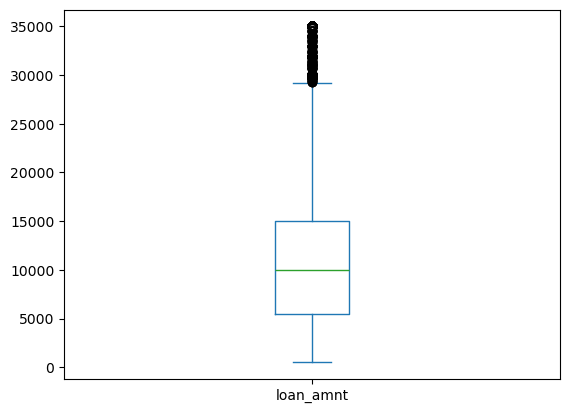

In [48]:
print(loan.shape)
print(loan["loan_amnt"].describe())
loan['loan_amnt'].plot(kind='box')

#5 **Univariate Analysis**

In [49]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [50]:
#Bucketing different varaibles for better analysis

In [51]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [52]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [53]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [54]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [55]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

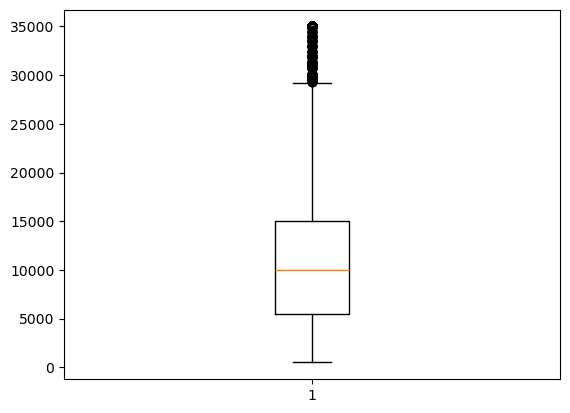

In [56]:
plot.boxplot(loan['loan_amnt'],)
plot.show()

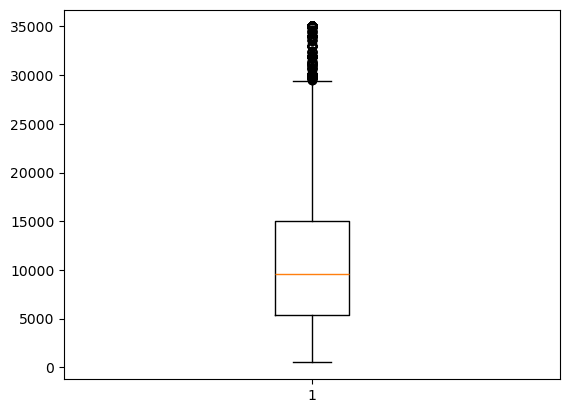

In [57]:
plot.boxplot(loan['funded_amnt'])
plot.show()

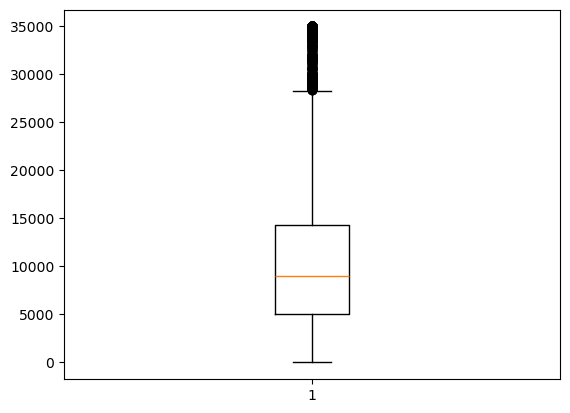

In [58]:
plot.boxplot(loan['funded_amnt_inv'])
plot.show()

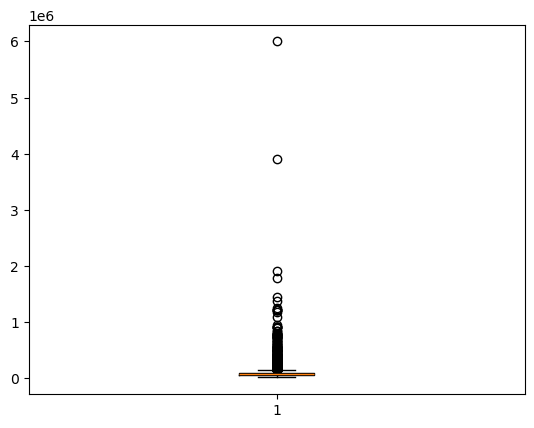

In [59]:
plot.boxplot(loan['annual_inc'])
plot.show()

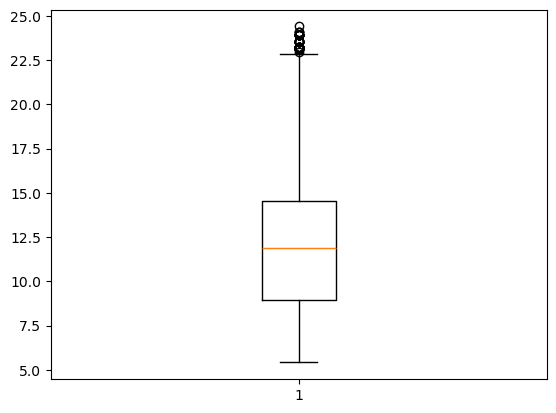

In [60]:
plot.boxplot(loan['int_rate'])
plot.show()

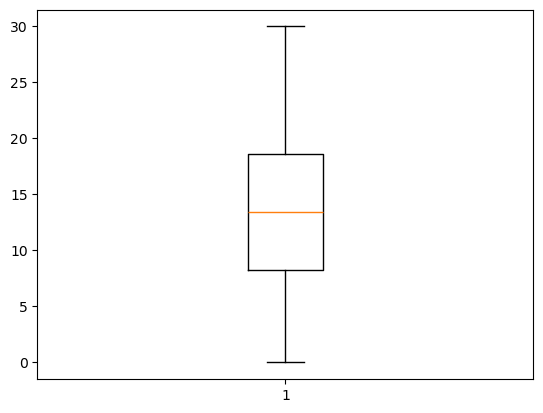

In [61]:
plot.boxplot(loan['dti'])
plot.show()

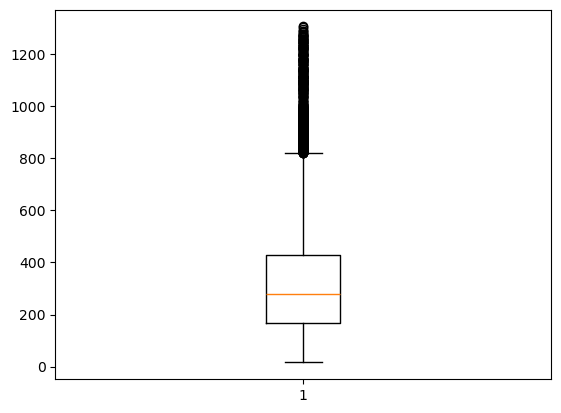

In [62]:
plot.boxplot(loan['installment'])
plot.show()

In [63]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
# Lets remove the outlier
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan =remove_outliers_iqr(loan, outliers_columns_set1,1.5)
loan =remove_outliers_iqr(loan, outliers_columns_set2,1.5)

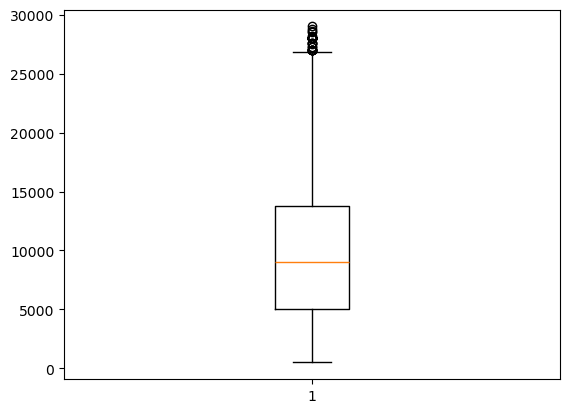

In [64]:
plot.boxplot(loan['loan_amnt'])
plot.show()

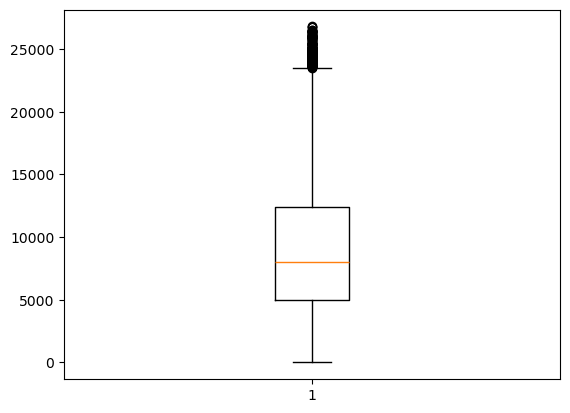

In [65]:
plot.boxplot(loan['funded_amnt_inv'])
plot.show()

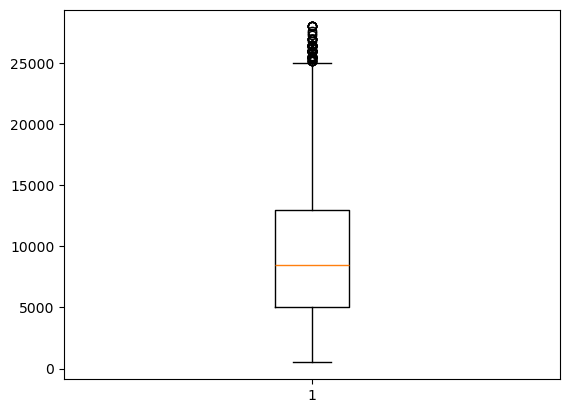

In [66]:
plot.boxplot(loan['funded_amnt'])
plot.show()

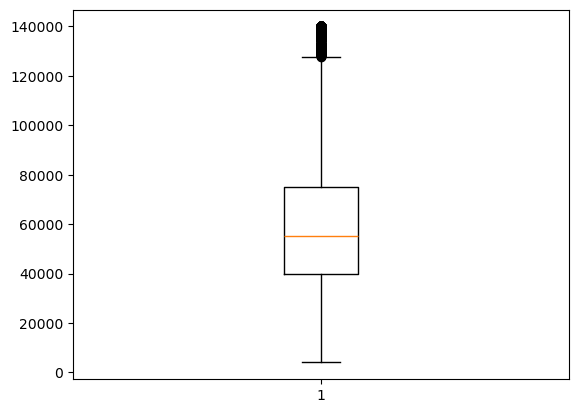

In [67]:
plot.boxplot(loan['annual_inc'])
plot.show()

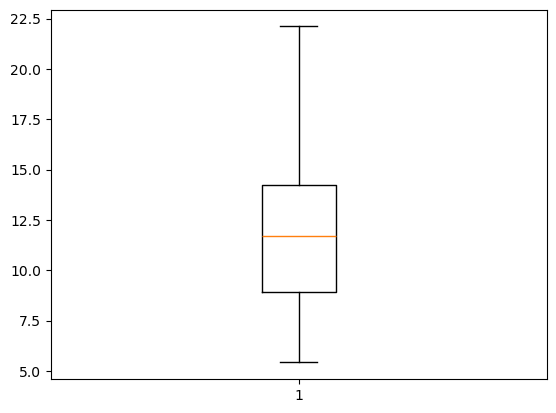

In [68]:
plot.boxplot(loan['int_rate'])
plot.show()

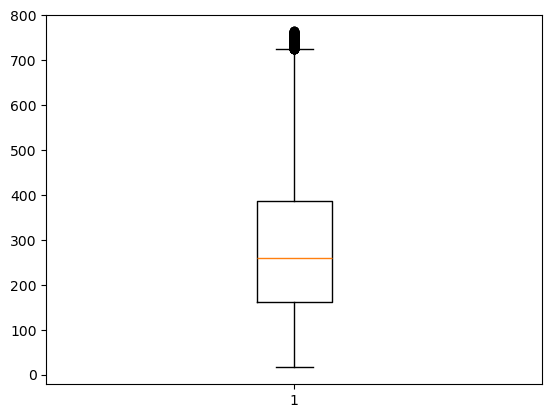

In [69]:
plot.boxplot(loan['installment'])
plot.show()

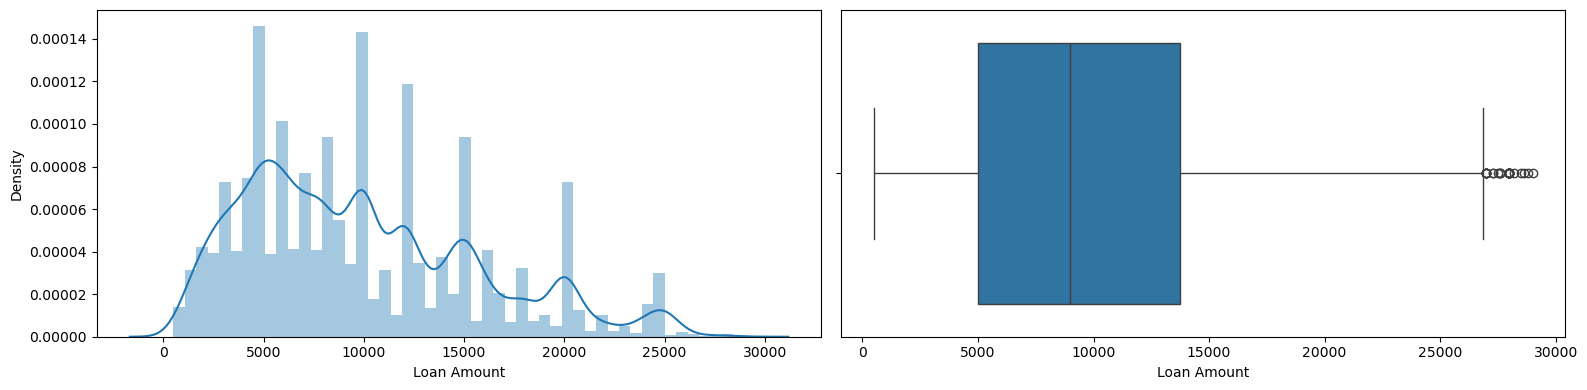

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [70]:
plot_digram(loan, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
loan['loan_amnt'].describe()

In [71]:
# observations from this graph

# The distribution of loan amounts is right-skewed, with a majority of loans falling between $5,000 and $15,000.
# The mean loan amount is around $11,000.
# There are a few outliers on the higher end, indicating some loans significantly larger than the average.


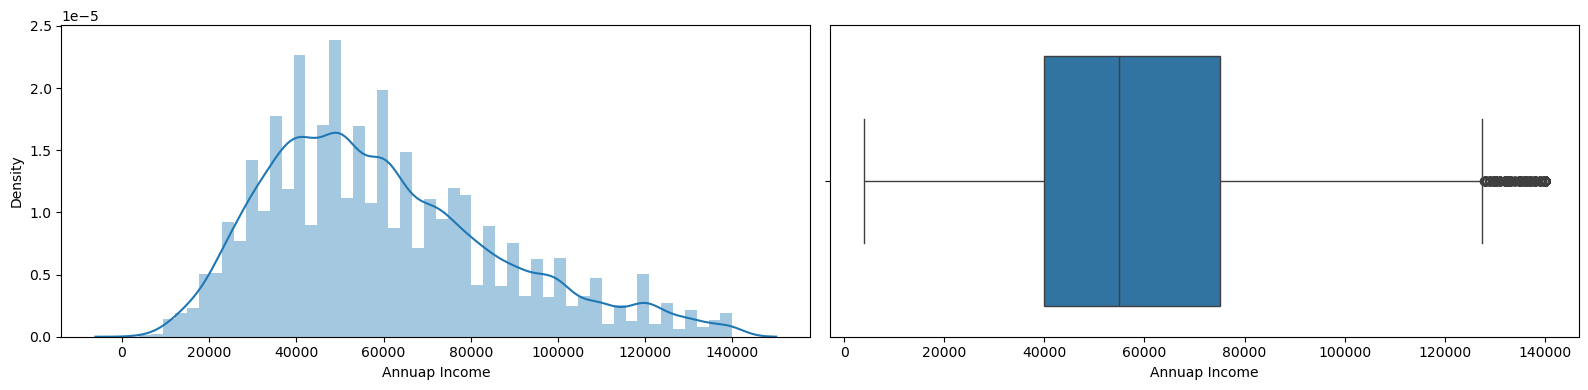

count     33191.000000
mean      59883.284633
std       26916.857465
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [72]:
plot_digram(loan, 'annual_inc')
#print(loan_df["loan_amnt"].mean())
# describe the annual income details
loan['annual_inc'].describe()

In [73]:
# Observations from the 'annual_inc' plot:

# The distribution of annual incomes is heavily right-skewed, indicating a concentration of borrowers with lower incomes and a long tail of high earners.
# The mean annual income is around $65,000, but the median is likely lower due to the skew.
# There are potential outliers on the higher end, suggesting a small number of borrowers with significantly higher incomes compared to the majority.


In [74]:
# The Annual income of most if applicants lies between 40k-75k.
print("Average Annual Income is :", round(loan['annual_inc'].mean(),0))

Average Annual Income is : 59883.0


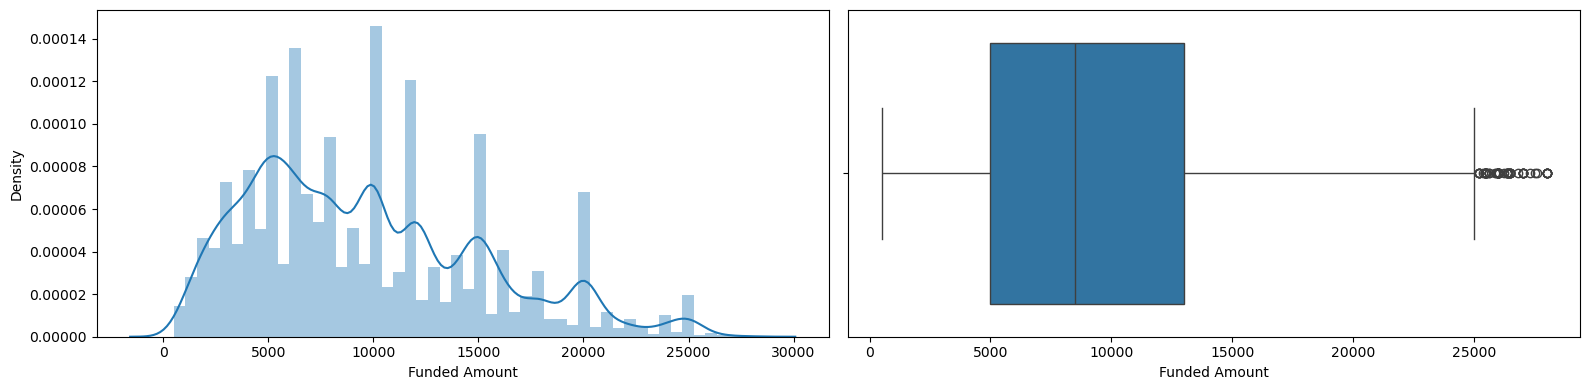

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [75]:
plot_digram(loan, 'funded_amnt')
loan['funded_amnt'].describe()

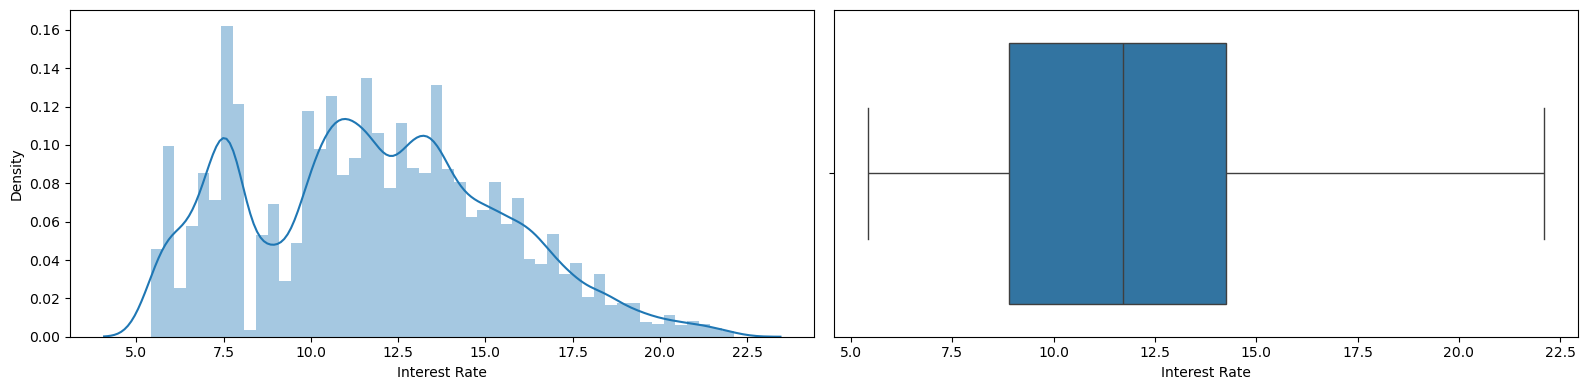

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [76]:
plot_digram(loan, 'int_rate')
loan['int_rate'].describe()

In [77]:

# Observations from the 'int_rate' plot:

# The distribution of interest rates appears to be bimodal, with peaks around 10% and 13%.
# The mean interest rate is approximately 12%.
# There are no significant outliers in the interest rate distribution.

# The interest rate for most of the loans lies between 9%-14%.


#6 **Unordered Categorical Variable Analysis**

<Axes: xlabel='home_ownership'>

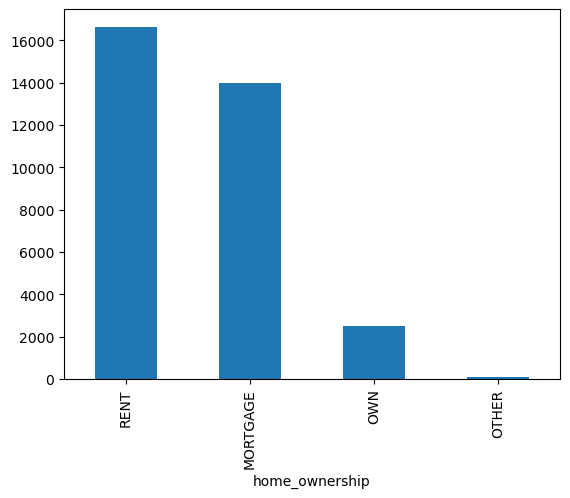

In [78]:
loan['home_ownership'].value_counts().plot.bar()

<Axes: xlabel='home_ownership'>

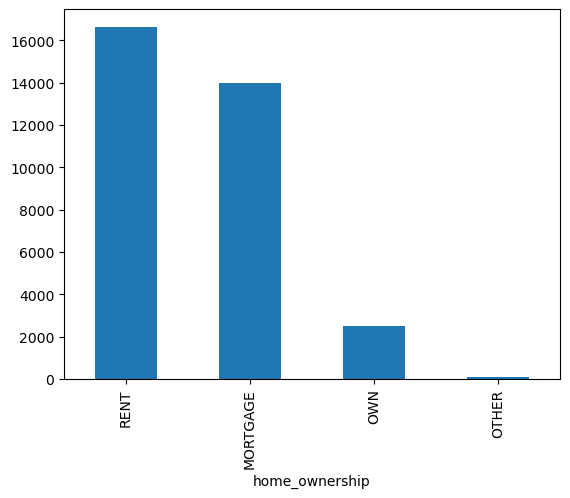

In [79]:
# observation for this graph

loan['home_ownership'].value_counts().plot.bar()
# Observation: Most loan applicants are either renting their homes or have a mortgage.


<Axes: xlabel='purpose'>

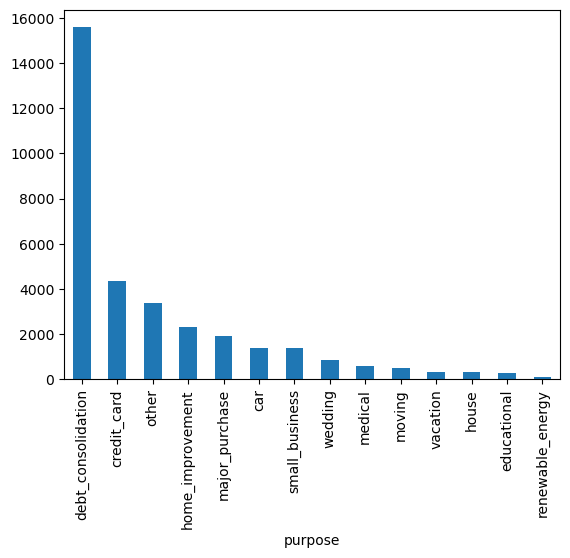

In [80]:
loan['purpose'].value_counts().plot.bar()

In [81]:
# Most loan applicants are seeking loans for debt consolidation.

In [82]:
Failed_per_houseowner_ship=loan
Failed_per_houseowner_ship["loan_status"].value_counts()

loan_status
Fully Paid     28477
Charged Off     4714
Name: count, dtype: int64

<Axes: ylabel='count'>

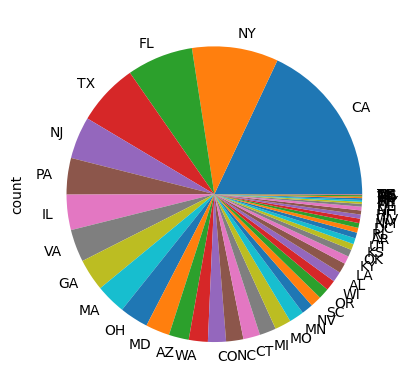

In [83]:
#using Pie plot to visualize
loan['addr_state'].value_counts().plot(kind="pie")

In [84]:
# Observation: The majority of loan applicants are from California (CA) State.


In [85]:
# Most of the Loan applicants are from CA(State).

# **Ordered Categorical Variable Analysis**

<Axes: ylabel='count'>

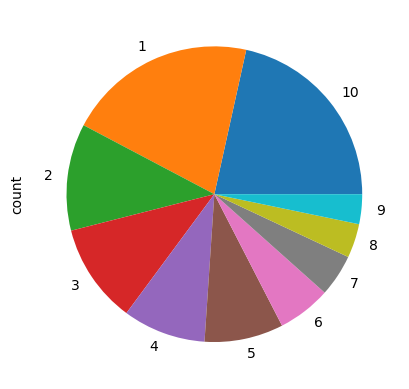

In [86]:
loan['emp_length'].value_counts().plot(kind="pie")

In [87]:
# Most of the applications are having 10+ yrs of Exp.

#7 **Bivariate Analysis**

In [88]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


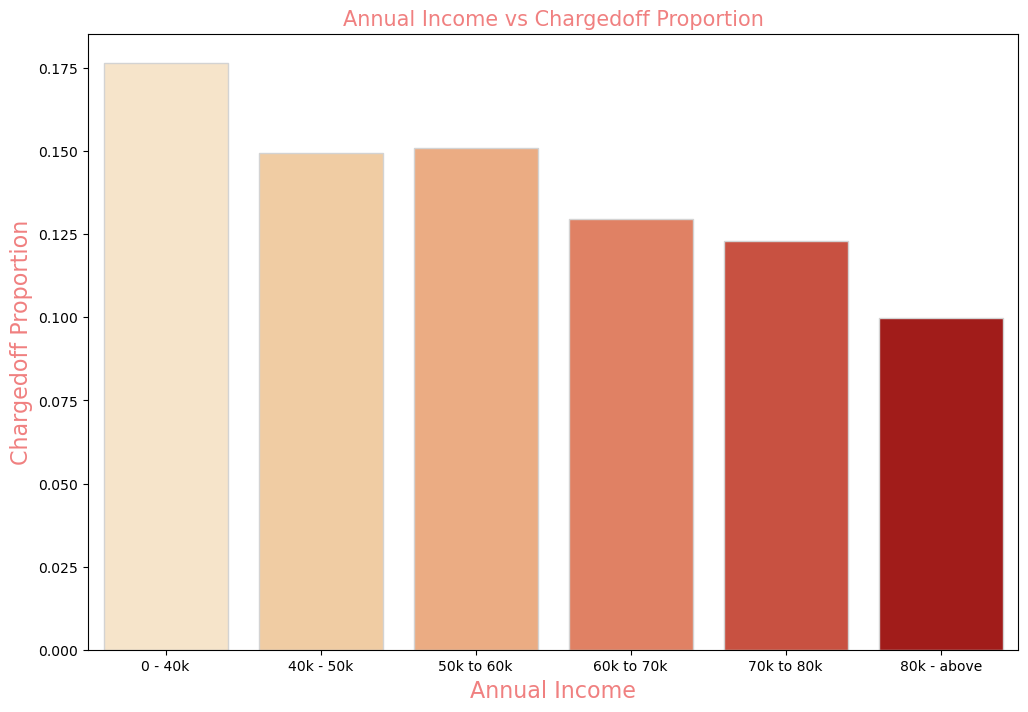

In [89]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plot.subplots(figsize=(12, 8) )
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan,
                  palette='OrRd', edgecolor='#D3D3D3')
ax1.set_ylabel('Chargedoff Proportion', fontsize=16, color='#F08080')
ax1.set_xlabel('Annual Income', fontsize=16, color='#F08080')
plot.show()





In [90]:
# observation for this graph

# Observation: Applicants with lower annual income are more likely to default on loans compared to those with higher annual incomes.
# This suggests that income level is a significant factor in assessing credit risk.


In [91]:
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-40000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [92]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


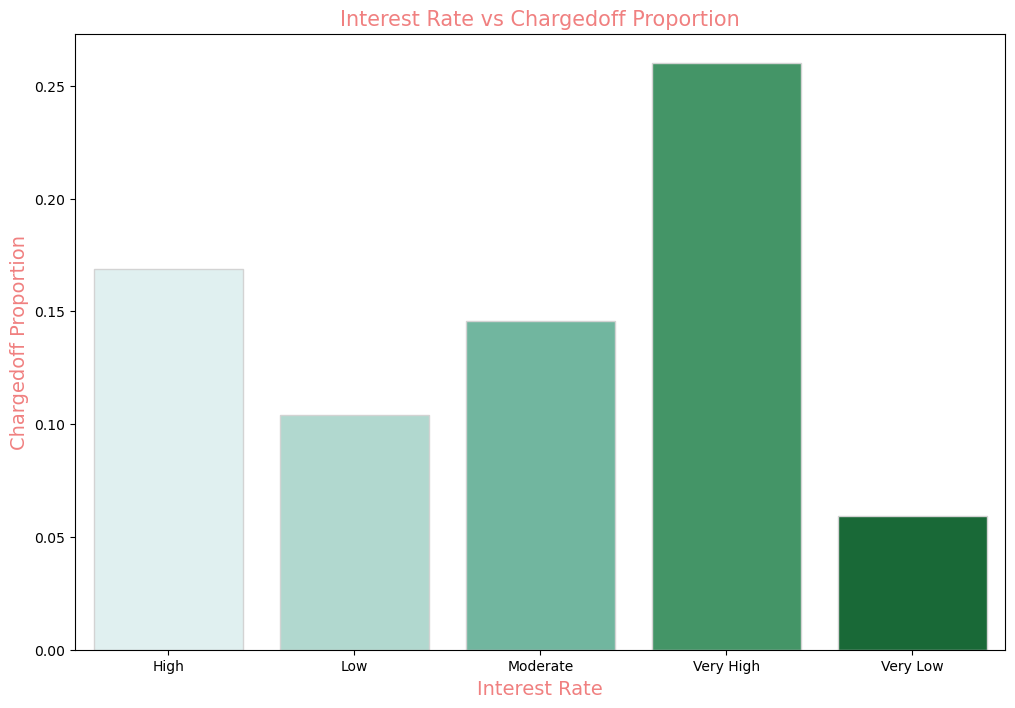

In [93]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15, color='#F08080')
ax1 = sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan,
                  palette='BuGn', edgecolor='#D3D3D3')
ax1.set_xlabel('Interest Rate', fontsize=14, color='#F08080')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F08080')
plot.show()




In [94]:
# observation for this graph

### Observation: Loans with higher interest rates have a noticeably higher rate of charge-offs, 
### suggesting that interest rates are a strong indicator of default risk. 
### Higher rates are linked to a greater likelihood of loan defaults.

In [95]:
# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimum 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

**Another inference form the houseowner variable those who are not owning the house are most likely to be charged off.**

In [96]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


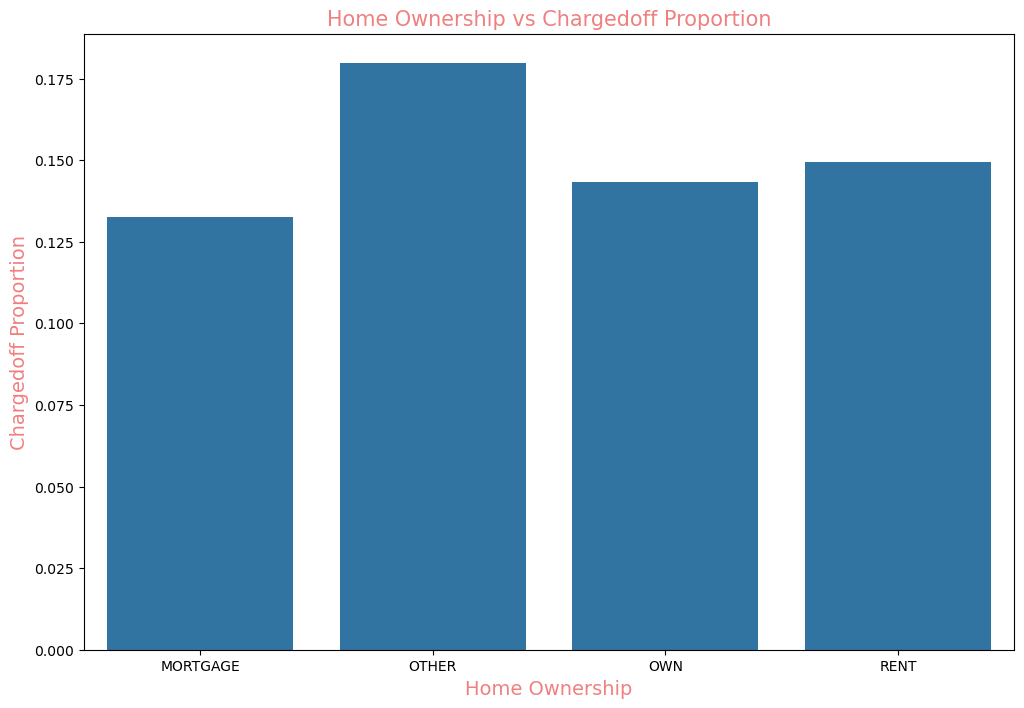

In [97]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_xlabel('Home Ownership',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.show()

In [98]:
# observation:
# Applicants who do not own a home have a higher likelihood of defaulting on their loans.

In [99]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


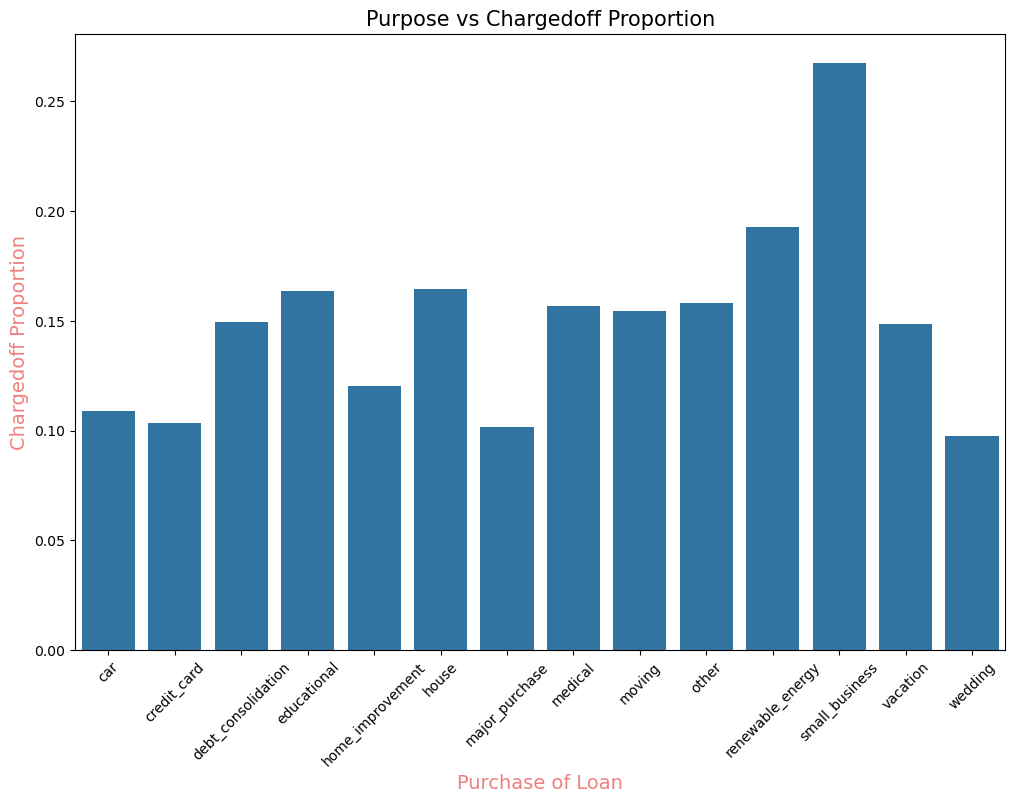

In [100]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15)
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [101]:
# observation:
# Applicants with a home loan are less likely to default on their loans, while those with loans for small businesses have a higher risk of defaulting

In [102]:
#Applicants with a home loan are less likely to default on their loans, while those with loans for small businesses have a higher risk of defaulting#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


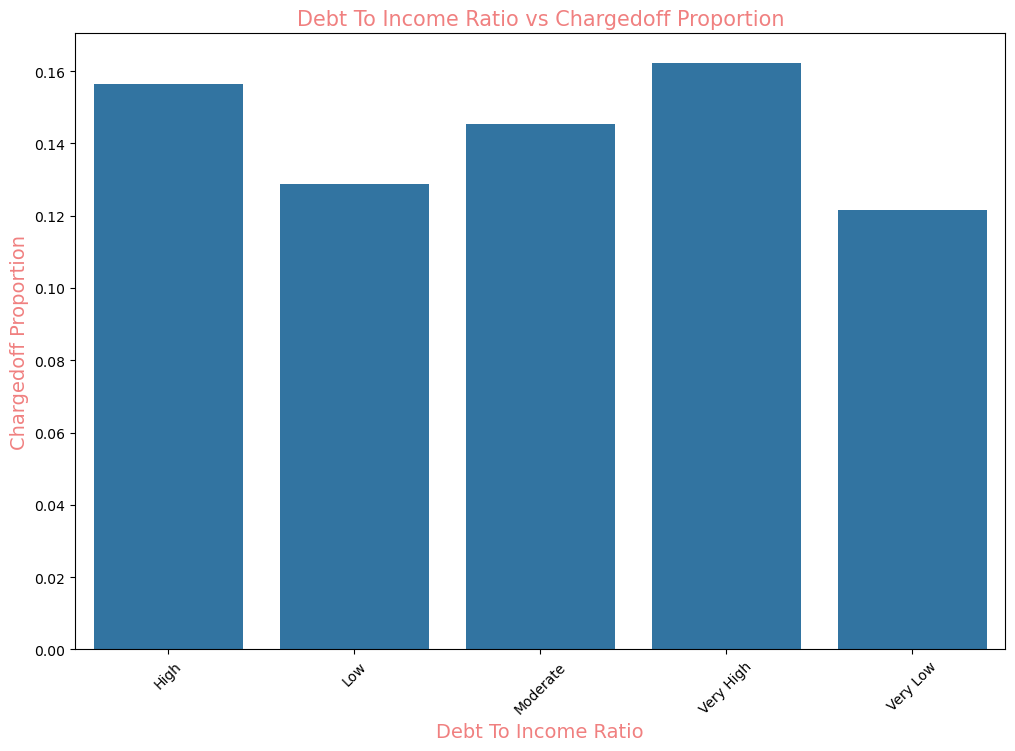

In [103]:
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [104]:
### Observation: As the Debt-to-Income (DTI) ratio rises, the proportion of charged-off loans also increases. 
### This implies that borrowers with higher DTI ratios are more prone to default.

In [105]:
# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTO having low chances loan defaults.

In [106]:
loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

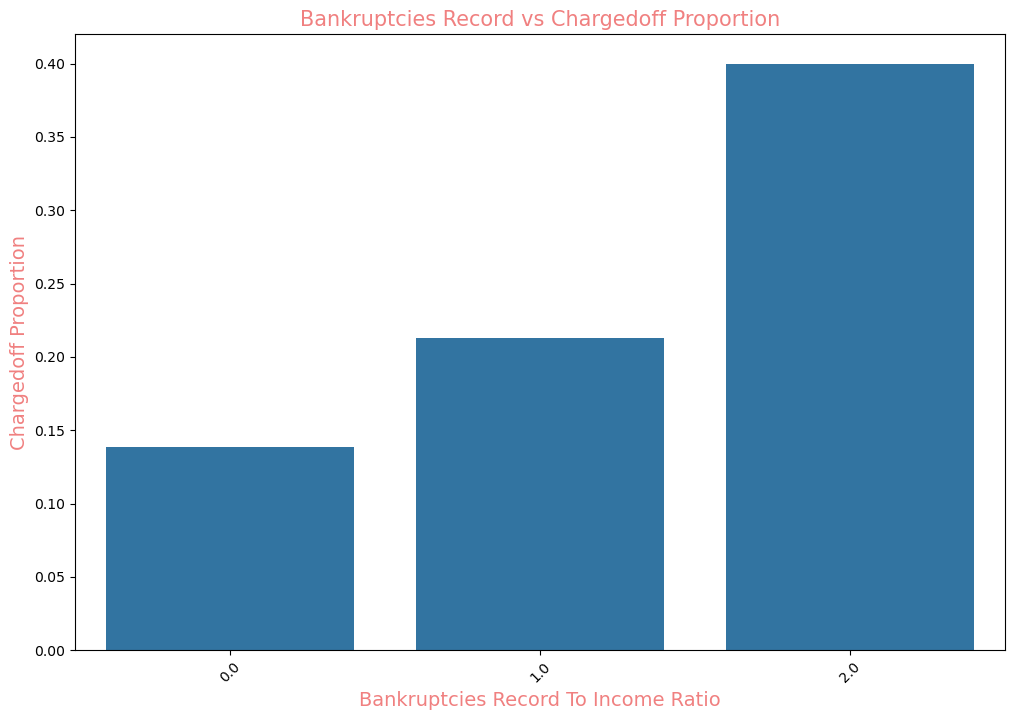

In [107]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [108]:
### Observation: Borrowers with a history of bankruptcies (pub_rec_bankruptcies > 0) exhibit a higher likelihood of loan default compared to those without any prior bankruptcies.
### This highlights the importance of considering past financial behavior as a key indicator of credit risk.


In [109]:
# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
# 2.Bankruptcies Record with 0 is low impact on loan defaults
# 3.Lower the Bankruptcies lower the risk.

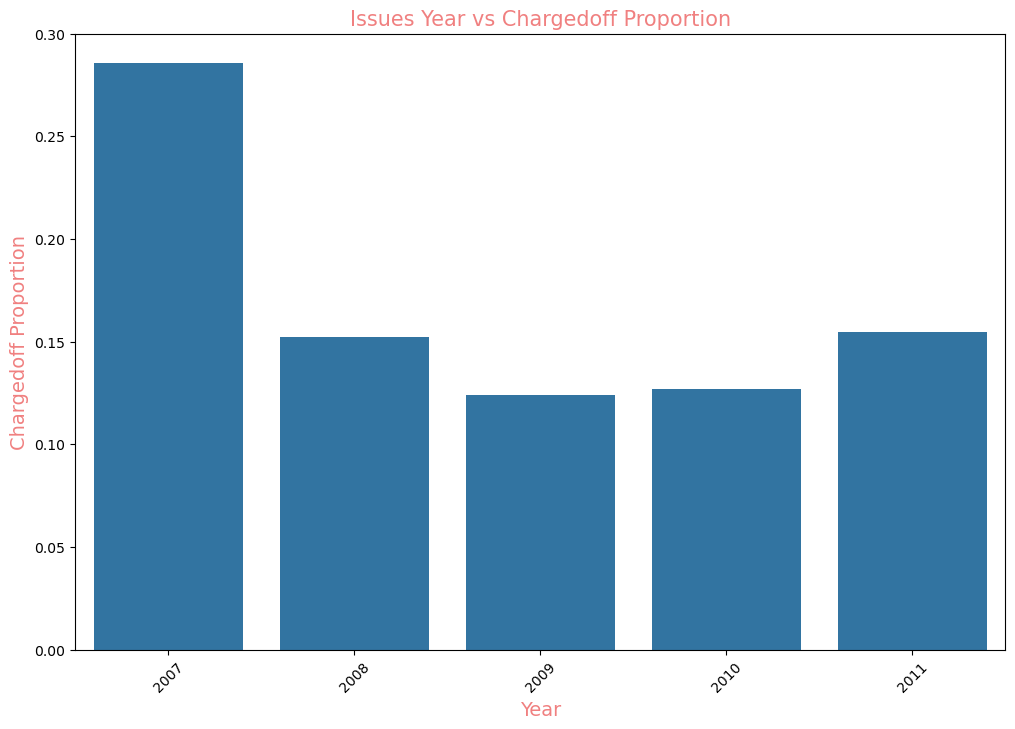

In [110]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Issues Year vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [111]:
### Observation: Loans issued in 2007 and 2008 have more charge-offs compared to those from recent years. 
### This could be due to the economic situation at the time or how lending practices have evolved since then.

In [112]:
   # Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.

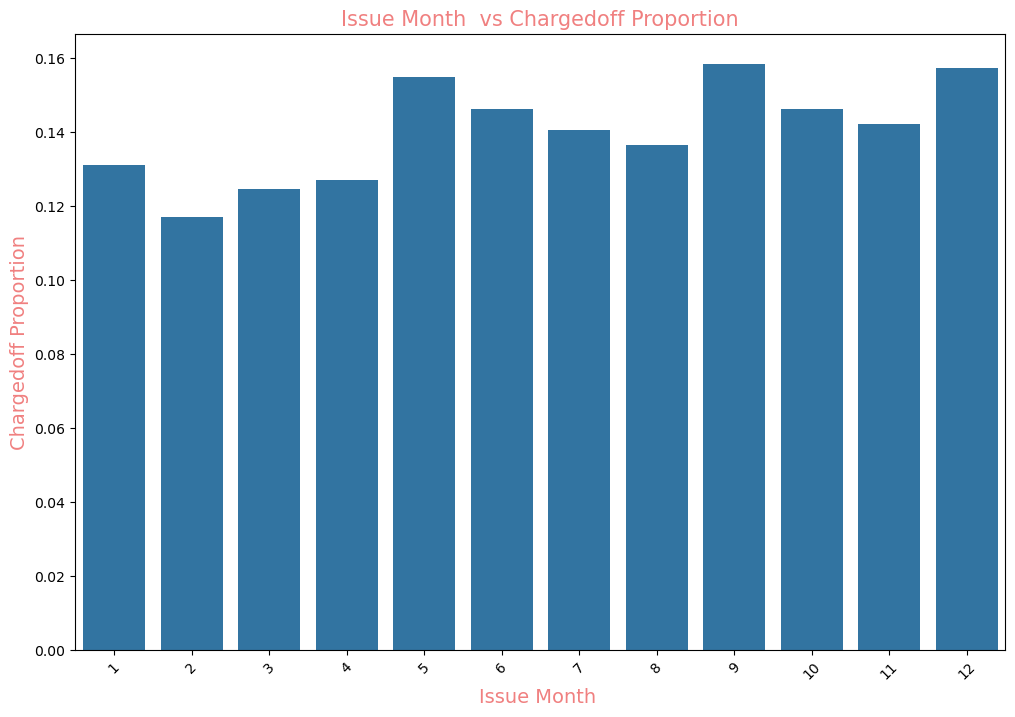

In [113]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = loan.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan)
ax1.set_xlabel('Issue Month ',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [114]:
### Observation: There is no clear trend or significant variation in charge-off proportions across different months of loan issuance.
### This suggests that the month in which a loan is issued might not be a strong predictor of default risk.


In [115]:
# 1. Those loan has been issued in May, September and december is having high number of loan defaults
# 2. Those loan has been issued in month of February is having high number of loan defaults
#3. Majority of loan defaults comig from applicants whose loan has been aprroved from September-to Deceber

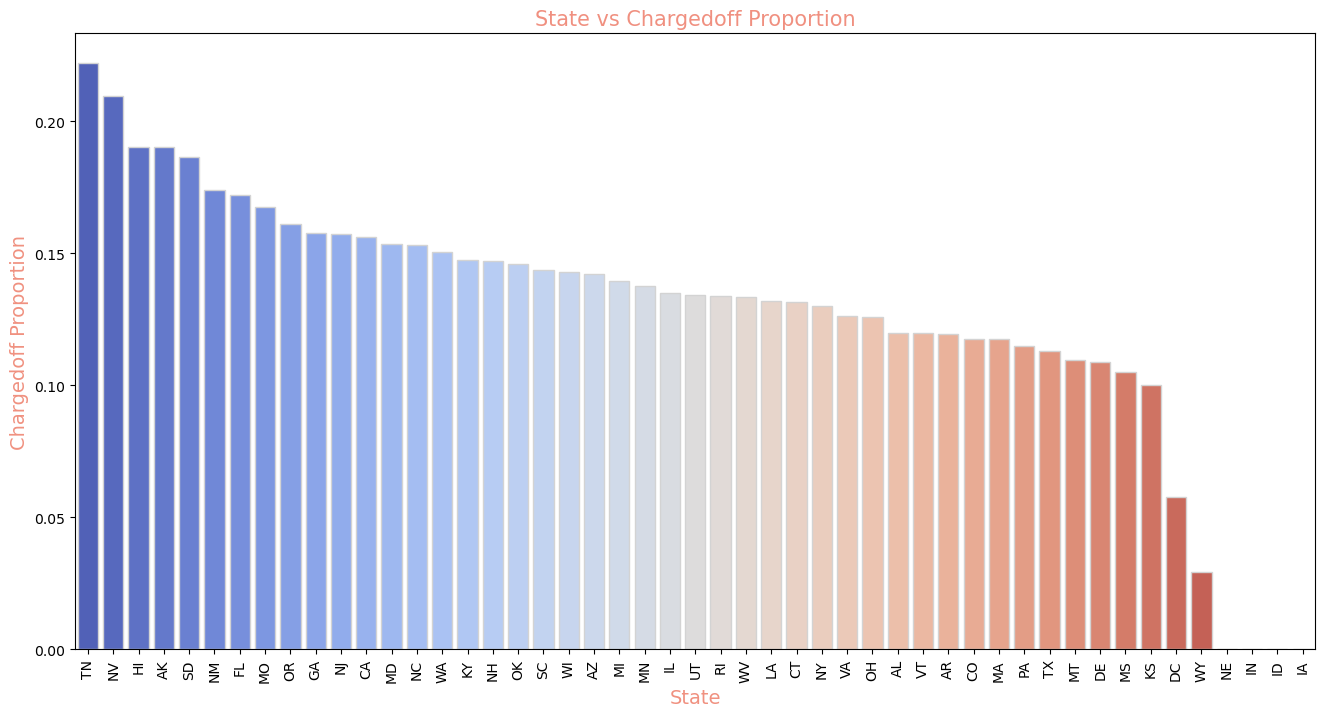

In [116]:
# Bivariate Analysis on Address State against Chargedoff_Proportion

addr_state_vs_loan = loan.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False, inplace=True)

# Graph
fig, ax1 = plot.subplots(figsize=(16, 8))  # Increased figure width
ax1.set_title('State vs Chargedoff Proportion', fontsize=15, color='#F09080')
ax1 = sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette='coolwarm', edgecolor='#D3D3D3')
ax1.set_xlabel('State', fontsize=14, color='#F09180')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='#F09180')

# Rotate x-axis labels to 90 degrees and reduce font size
plot.xticks(rotation=90, fontsize=10, ha='center')

# Show the plot
plot.show()



In [117]:
# Observations:
# States like NV, AK, FL are having high chances of loan defaults.
# States like IA, ME, ID are having low chances of loan defaults.


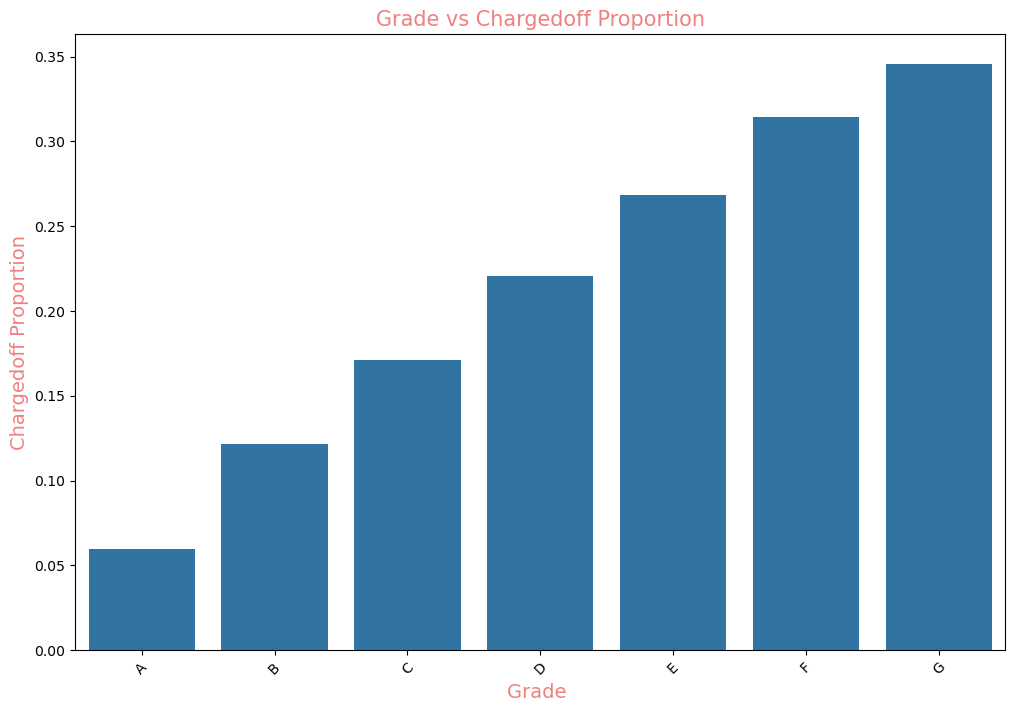

In [118]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plot.subplots(figsize=(12, 8))
ax1.set_title('Grade vs Chargedoff Proportion',fontsize=15,color='#F08080')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='#F08080')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color='#F08080')
plot.xticks(rotation=45)
plot.show()

In [119]:
# observations :
# 1. Loan applicants with a Grade G loan have the highest default rates.
# 2. Loan applicants with a Grade A loan have the lowest default rates.

# **Correlation Analysis**

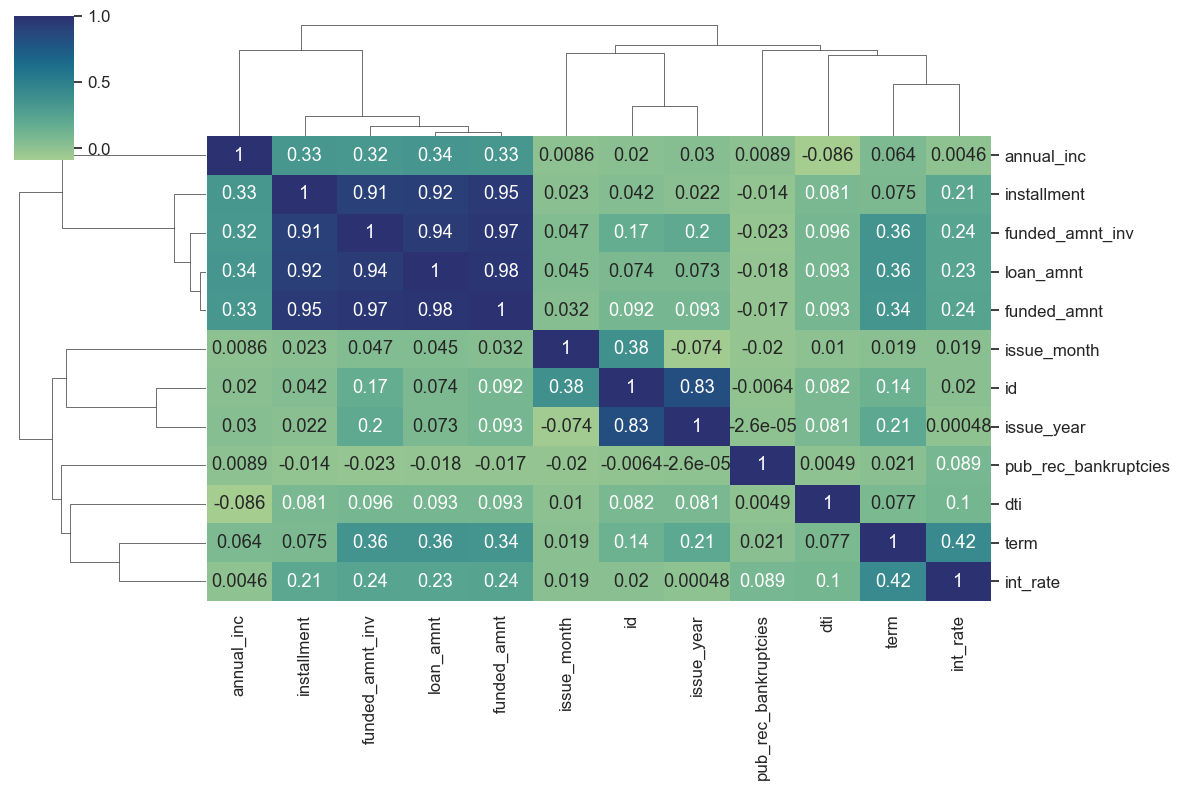

In [120]:
corr_loan = loan.select_dtypes(include=['number'])
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="crest")
plot.show()

In [121]:
# Observations from the correlation heatmap:

# Loan amount, funded amount, and investor-funded amount are closely linked, meaning that larger loan requests generally get more funding.
# Interest rates have a moderate positive correlation with loan amounts, suggesting that bigger loans often come with higher interest rates.
# The installment amount is strongly related to both the loan amount and the funded amount, showing that larger loans lead to higher monthly payments.

# Negative Correlations:
# There’s a weak negative correlation between public record bankruptcies and annual income, indicating that people with higher incomes are less likely to have bankruptcy records.

# Overall:
# The heatmap highlights how different numerical variables in the loan dataset are related.
# These correlations can help us understand factors that affect loan approval, interest rates, and the chances of default.

In [122]:
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']
corr_loan = corr_loan.drop(columns=drop_columns)

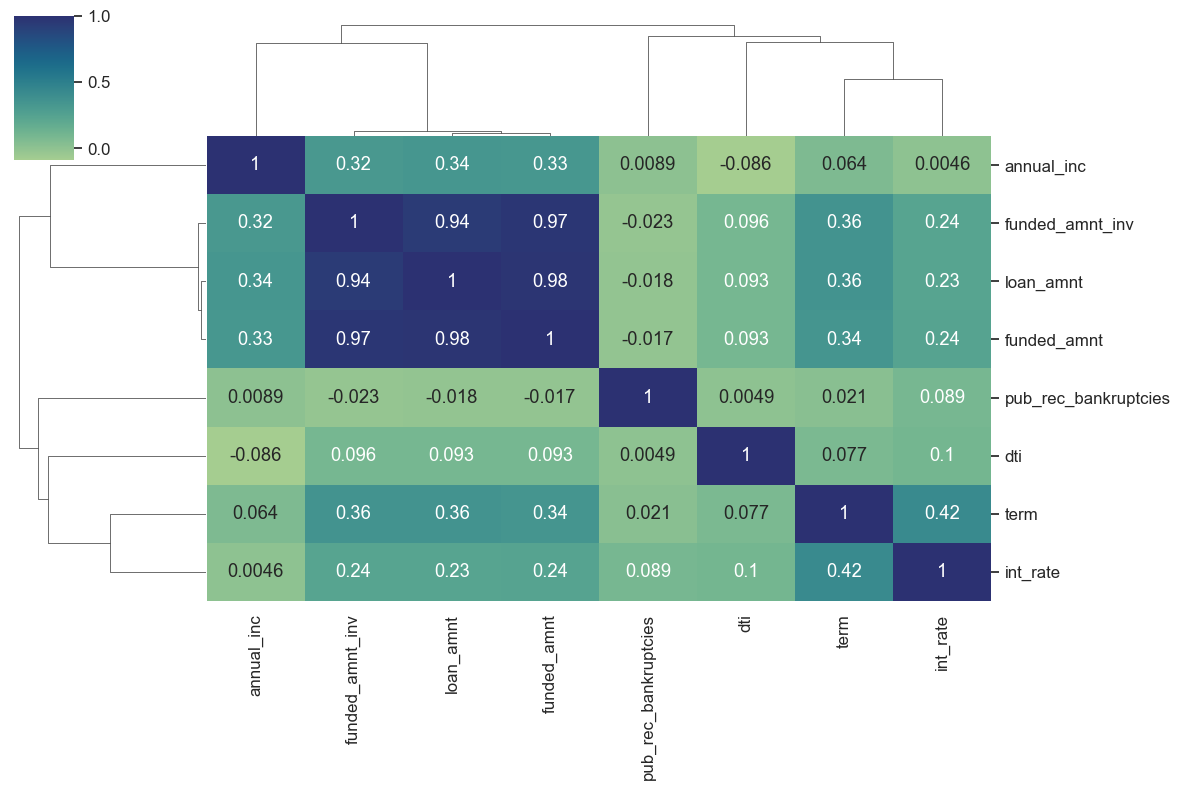

In [123]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="crest")
plot.show()

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

<Axes: xlabel='term', ylabel='loan_amnt'>

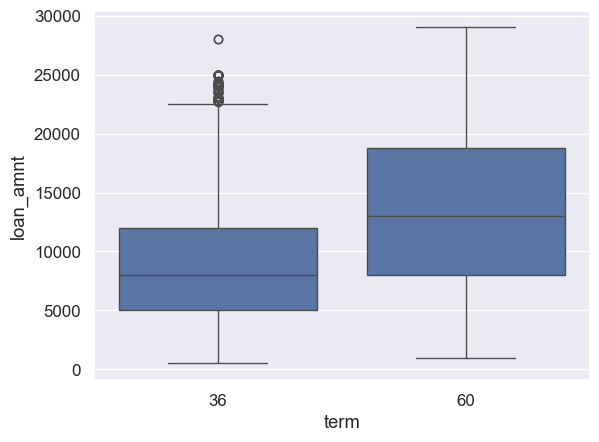

In [124]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

In [125]:
# This graph shows a bivariate analysis of loan term ('term') versus loan amount ('loan_amnt') using a box plot. Here's what we can learn from it:

# - Median Loan Amount: The line inside each box marks the median loan amount for each term. This helps us see if loans with longer terms generally have higher or lower median amounts.
# - Interquartile Range (IQR): The box represents the range where the middle 50% of loan amounts fall. This shows us how much loan amounts vary within each term category.
# - Outliers: Dots or circles outside the "whiskers" of the box plot highlight outliers, which are loan amounts significantly higher or lower than most others for that term.
# - Distribution Shape: The shape of the box and whiskers can reveal the distribution pattern of loan amounts. For example, a longer upper whisker might indicate a right-skewed distribution, meaning there are more larger loan amounts.

# By examining this box plot, we can better understand the relationship between loan term and loan amount, and identify any significant differences in loan amount distributions across different terms.

from the above graph we can see that if term is increasing loan amount is also increasing

<Axes: xlabel='term', ylabel='int_rate'>

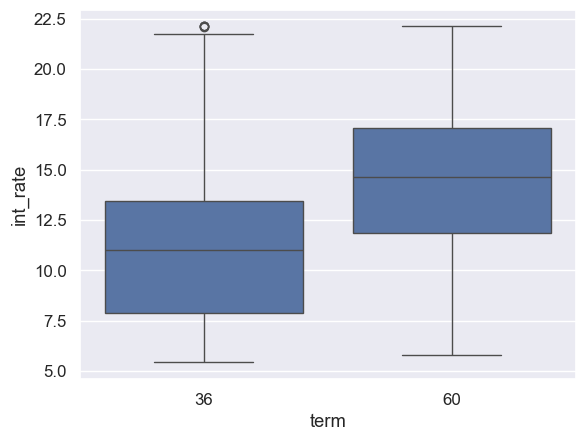

In [126]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

In [127]:
# observation -
# Loans with longer terms (60 months) typically come with higher interest rates compared to shorter terms (36 months). 
# This trend reflects the greater risk associated with longer-term lending, as lenders face the possibility of defaults over a more extended period.

In [128]:
# This code conducts univariate and bivariate analysis on the loan dataset.
# It visualizes the distributions, variable relationships, and correlations.

In [129]:
# Overall Data Analysis - Summary

# Loan applicants with lower incomes and higher interest rates are more prone to default.
# Borrowers without homeownership and those with a history of bankruptcies present a greater risk.
# The purpose of the loan affects default rates, with small business loans being particularly high-risk.
# Loans issued in earlier years (2007-2008) have higher charge-off rates.
# States such as NV, AK, and FL have higher default rates compared to IA, ME, and ID.